# **Imports**

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split , cross_val_score , RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score , classification_report , accuracy_score , confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv')
df.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


# **Explore the data**

In [3]:
df.shape

(246022, 40)

In [4]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [6]:
# describtion for numerical columns
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


# **Calculate missing values**

In [7]:
df.isna().sum().sort_values(ascending = False).head(5)

State                        0
Sex                          0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
dtype: int64

> There is no missing values

# **Feature selection**

Create the target variable HeartDisease: if HadHeartAttack or HadAngina is Yes, set it to 1. Features such as State and Sex have low correlation in predicting heart disease, remove to reduce dimensionality.



In [8]:
# drop 'State' and 'Sex' columns
df.drop(columns = ['State', 'Sex'], inplace = True)

In [9]:
# Encoding columns
replacement_dict = {'Yes': 1, 'No': 0}
df['HadHeartAttack'] = df['HadHeartAttack'].replace(replacement_dict)
df['HadAngina'] = df['HadAngina'].replace(replacement_dict)

# Create a new column that will be our target column
df['HeartDisease'] = df['HadHeartAttack'] | df['HadAngina']

# Drop old columns
df.drop(columns = ['HadHeartAttack','HadAngina'], inplace = True)

df.shape

(246022, 37)

>**Here we create our target column 'HeartDisease' from columns ['HadHeartAttack','HadAngina']**

# # **Data distribution**

# **Numerical columns**

In [10]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
print(df_num.shape)
df_num.head()

(246022, 7)


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartDisease
0,4.0,0.0,9.0,1.60,71.67,27.99,0
1,0.0,0.0,6.0,1.78,95.25,30.13,0
2,0.0,0.0,8.0,1.85,108.86,31.66,0
3,5.0,0.0,9.0,1.70,90.72,31.32,0
4,3.0,15.0,5.0,1.55,79.38,33.07,0


**Plot the distribution for all the numerical features.**

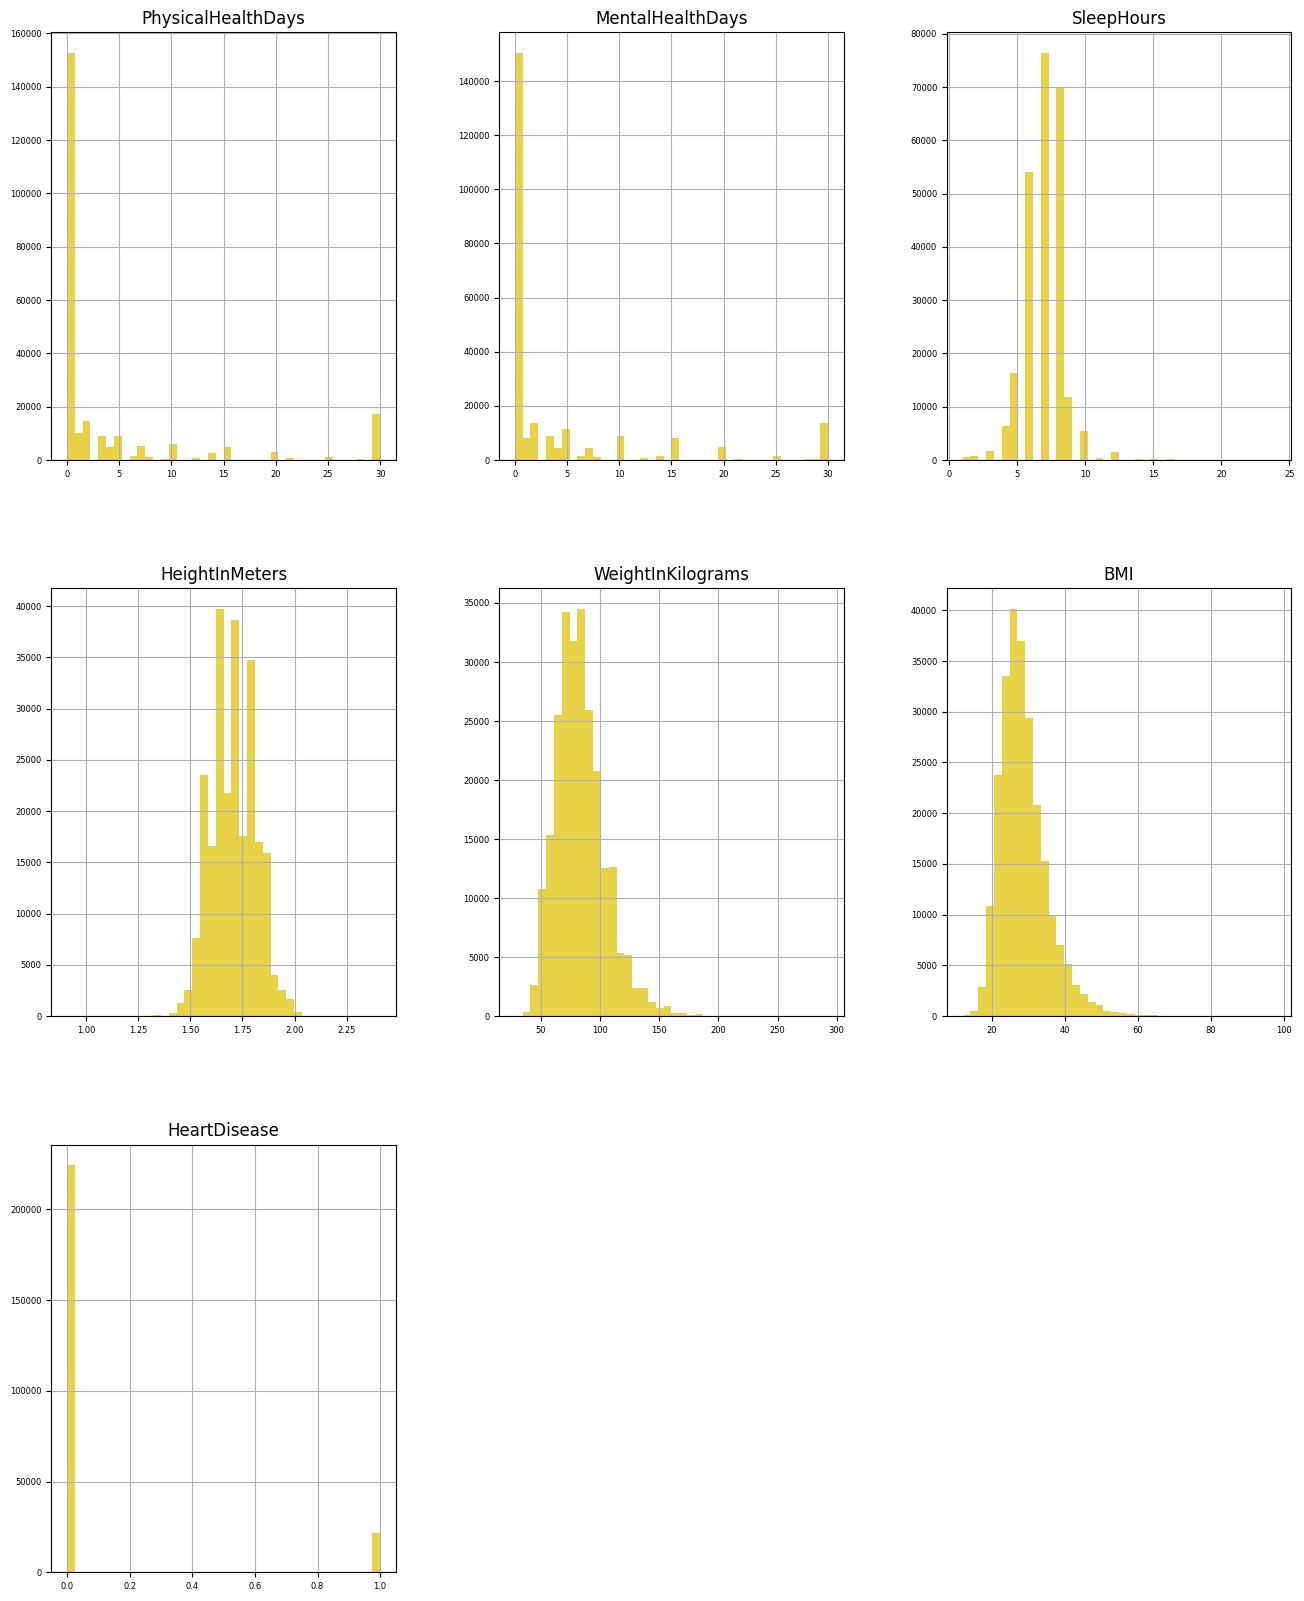

In [11]:
df_num.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6, color="#E8D248");

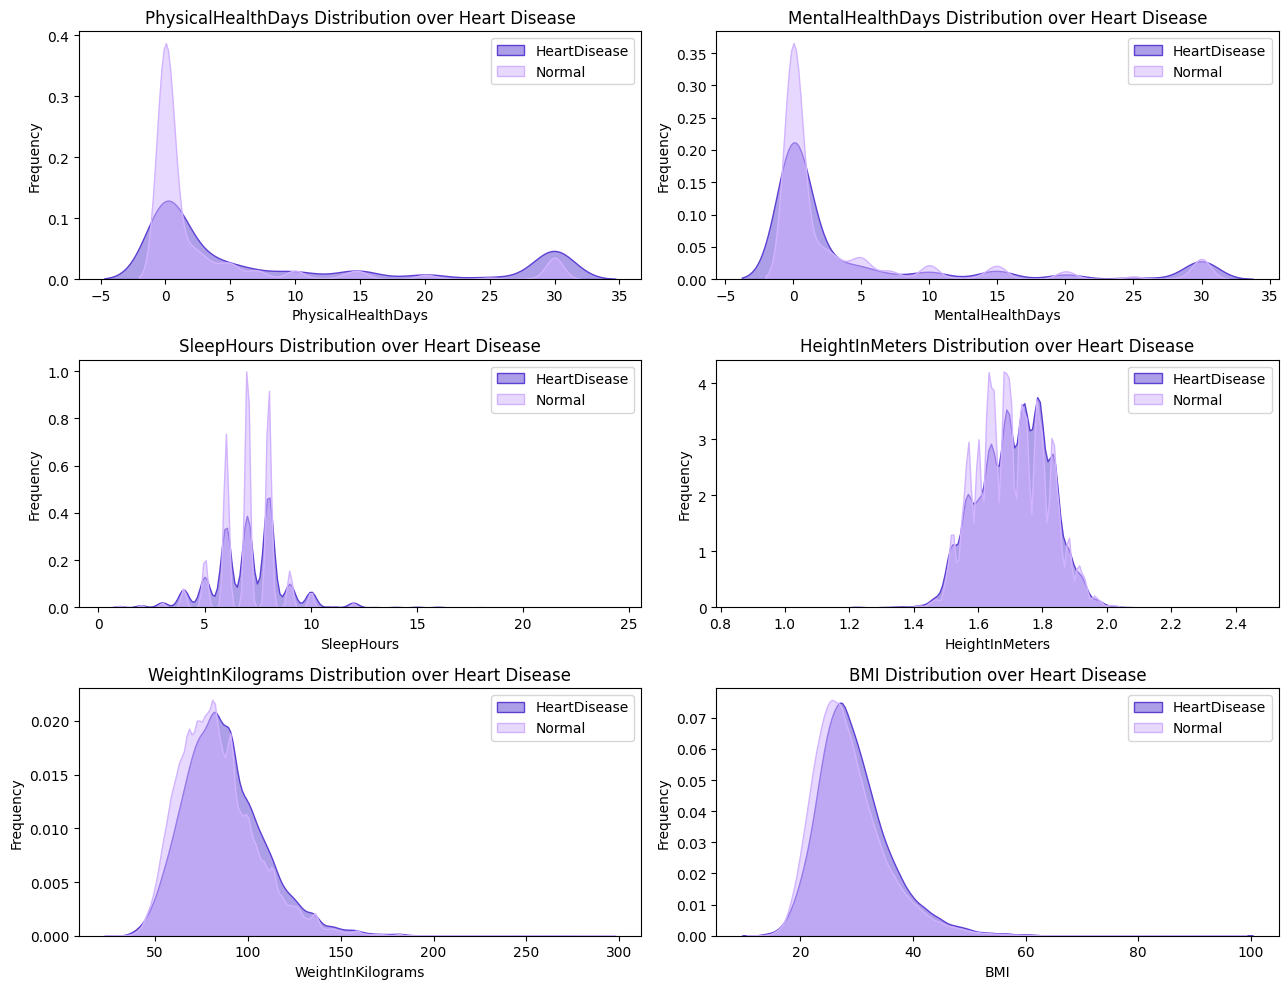

In [12]:
fig, axes = plt.subplots(nrows=len(df_num.columns) // 2, ncols=2, figsize=(13, 10))

for idx, column in enumerate(df_num.drop(columns = 'HeartDisease')):
    row_idx = idx // 2
    col_idx = idx % 2
    
    sns.kdeplot(df[df["HeartDisease"] == 1][column], alpha=0.5, fill=True, color="#5D3FD3", label="HeartDisease", ax=axes[row_idx, col_idx])
    sns.kdeplot(df[df["HeartDisease"] == 0][column], alpha=0.5, fill=True, color="#D1B3FF", label="Normal", ax=axes[row_idx, col_idx])
    
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel("Frequency")
    axes[row_idx, col_idx].set_title(f"{column} Distribution over Heart Disease")
    axes[row_idx, col_idx].legend()

plt.tight_layout()
plt.show()

# **Categorical columns**

**Check for high and low cardinality**

In [13]:
df_cat = df.select_dtypes('object')
df_cat.nunique().sort_values()

DifficultyConcentrating       2
DifficultyErrands             2
DifficultyDressingBathing     2
DifficultyWalking             2
HighRiskLastYear              2
BlindOrVisionDifficulty       2
DeafOrHardOfHearing           2
HIVTesting                    2
HadArthritis                  2
HadKidneyDisease              2
HadDepressiveDisorder         2
HadCOPD                       2
HadSkinCancer                 2
HadAsthma                     2
HadStroke                     2
FluVaxLast12                  2
PhysicalActivities            2
PneumoVaxEver                 2
AlcoholDrinkers               2
ChestScan                     2
CovidPos                      3
SmokerStatus                  4
HadDiabetes                   4
RemovedTeeth                  4
LastCheckupTime               4
TetanusLast10Tdap             4
ECigaretteUsage               4
RaceEthnicityCategory         5
GeneralHealth                 5
AgeCategory                  13
dtype: int64

# **Outliers**

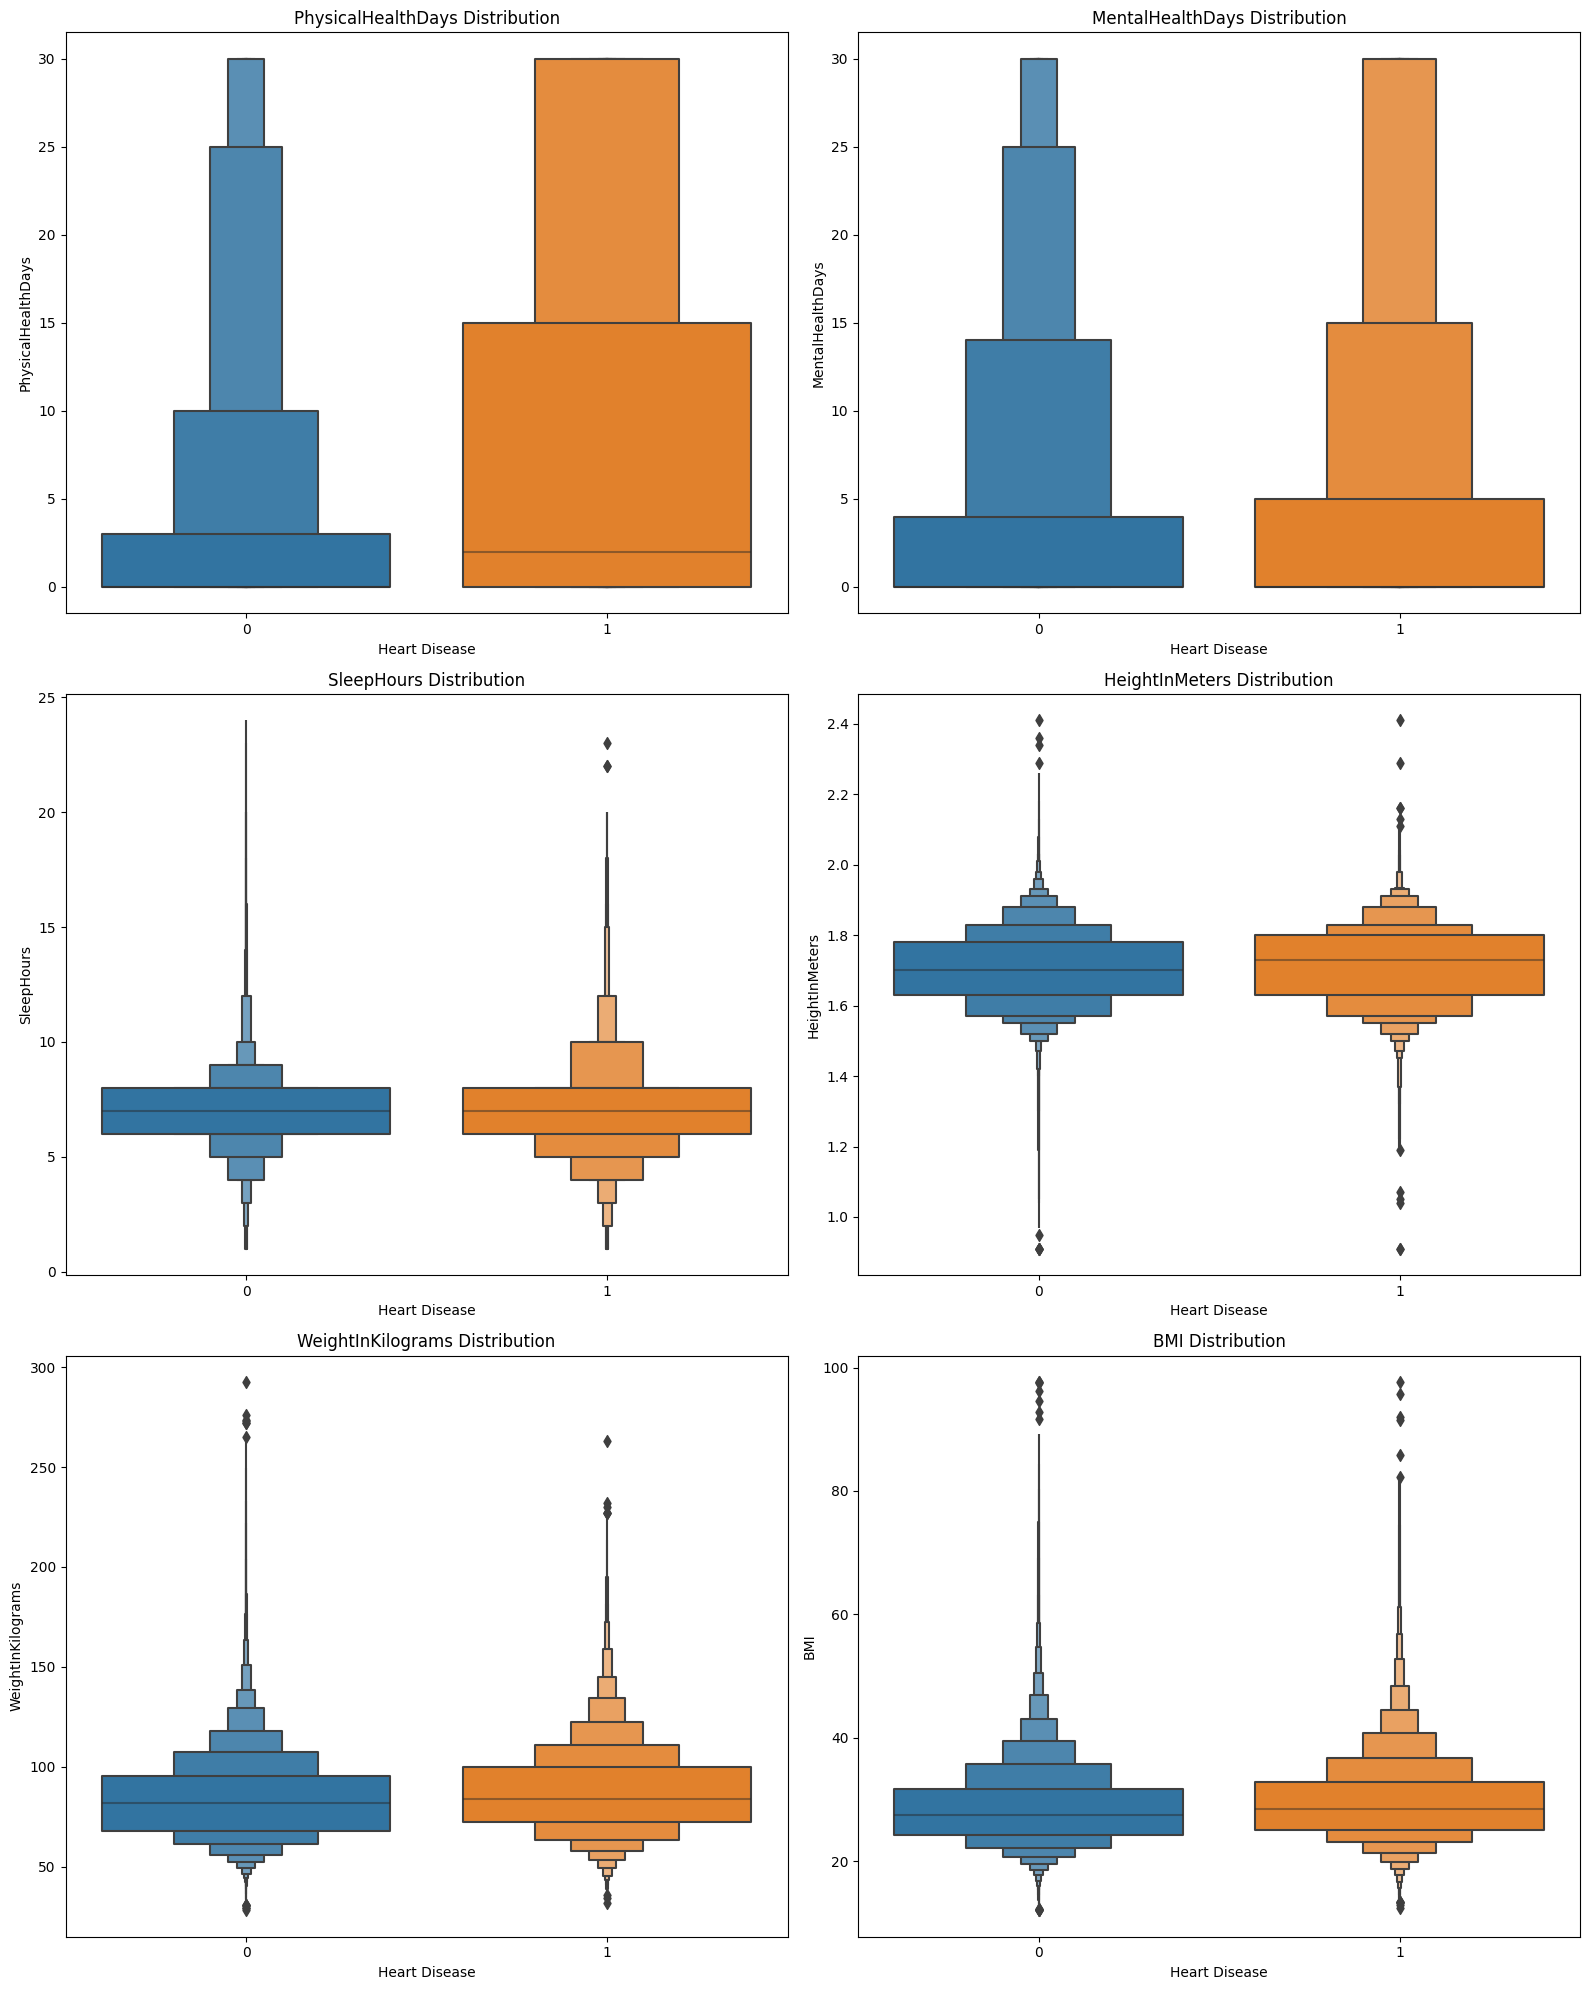

In [15]:
fig, axes = plt.subplots(nrows=len(df_num.columns) // 2, ncols=2, figsize=(16, 20))

for idx, column in enumerate(df_num.drop(columns = 'HeartDisease')):
    row_idx = idx // 2
    col_idx = idx % 2
    
    sns.boxenplot( x='HeartDisease' , y= column , data=df, ax=axes[row_idx, col_idx])
    
    axes[row_idx, col_idx].set_xlabel("Heart Disease")
    axes[row_idx, col_idx].set_ylabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")

plt.tight_layout()
plt.show()

> **There is no many outliers**

# **Multicollinearity**

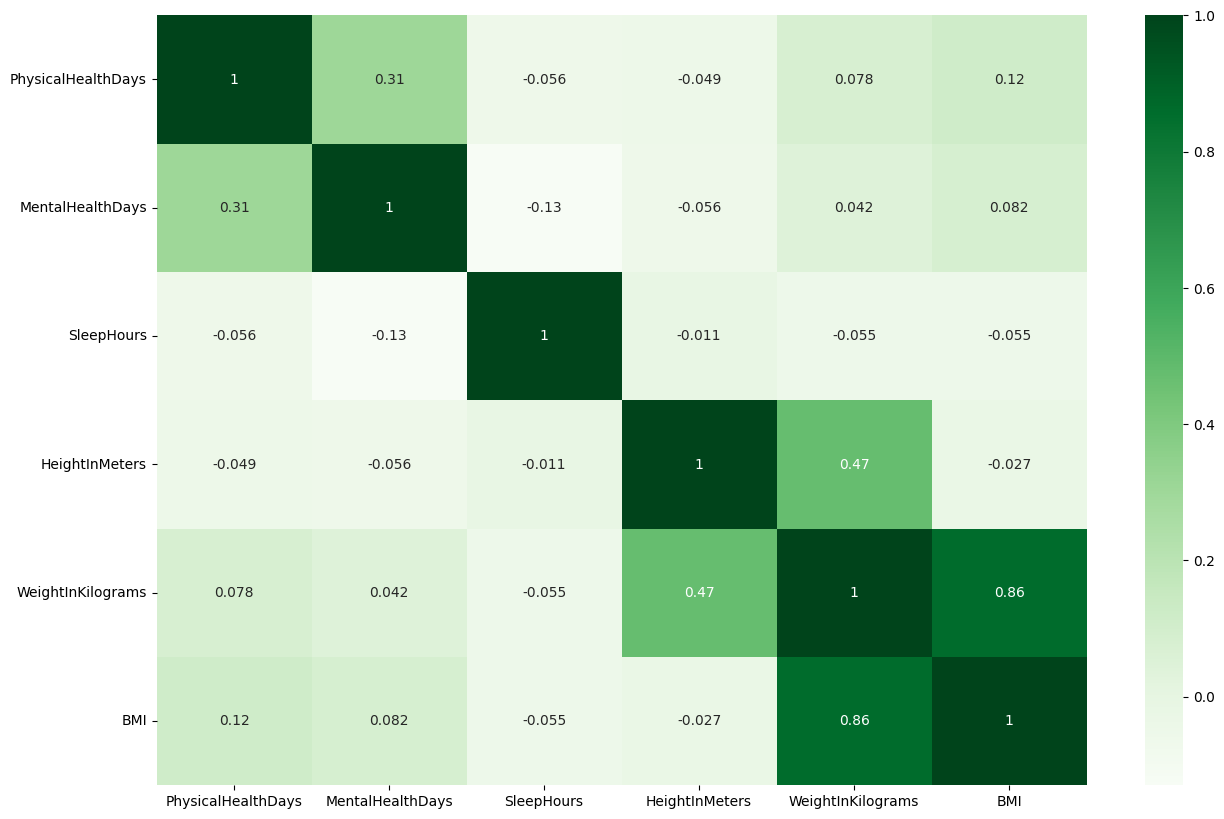

In [16]:
corr = df_num.drop(columns= 'HeartDisease').corr()
fig , ax = plt.subplots(figsize=(15 , 10))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens');

**Now we will search for columns that has a correlation more than 70% and drop one of them with the condition that the correlation with the target column (HeartDisease) is smaller than another column**

In [17]:
# check the correlation for columns => WeightInKilograms & BMI with the target
print(f"Correlation between WeightInKilograms and BMI :{df['WeightInKilograms'].corr(df['BMI'])}")

print(f"Correlation between WeightInKilograms and the target :{df['WeightInKilograms'].corr(df['HeartDisease'])}")

print(f"Correlation between BMI and the target :{df['BMI'].corr(df['HeartDisease'])}")

Correlation between WeightInKilograms and BMI :0.8593132327366465
Correlation between WeightInKilograms and the target :0.050384539873866
Correlation between BMI and the target :0.04500233612614122


In [18]:
# drop 'WeightInKilograms' column
df.drop(columns = 'WeightInKilograms', inplace = True)

# **Encoding categorical data**

In [19]:
#this for Dummy calsifier 
dfc = df

In [20]:
df_categorical=df_cat.columns
df_categorical

Index(['GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
       'RemovedTeeth', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [21]:
preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), df_categorical)],
    remainder='passthrough')

X_transformed = preprocessor.fit_transform(df.drop(columns = 'HeartDisease'))

# **Splitting data for train and test**

In [22]:
target = df['HeartDisease']

X_train , X_test , y_train , y_test = train_test_split(X_transformed ,target ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (196817, 95)
y_train shape: (196817,)
X_test shape: (49205, 95)
y_test shape: (49205,)


# **Target balance**

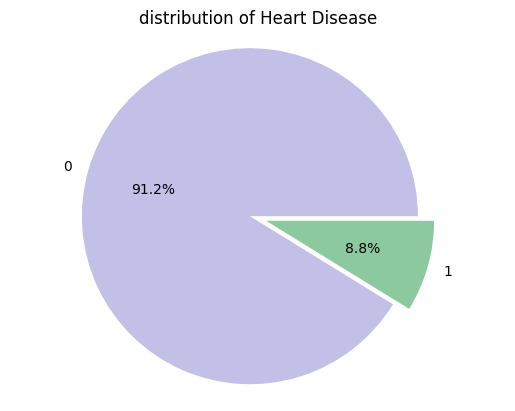

In [23]:
heart_disease_column = df.HeartDisease.value_counts()

# pie chart for target column
plt.pie(heart_disease_column, labels = heart_disease_column.index, autopct="%1.1f%%", explode = [0,0.1], colors = ["#c2c0e7","#8dc99f"])
plt.title("distribution of Heart Disease")
plt.axis("equal")
plt.show()

> **so we can see that data is imbalanced**

# **Resampling data**

**The best technique in resampling is to merge between over_sampling and under_sampling Because this means you do not lose a lot of features values that can make your model better and the duplication in over_sampling tries to make a model prediction balanced between target labels.**

In [24]:
df.HeartDisease.value_counts()

HeartDisease
0    224406
1     21616
Name: count, dtype: int64

In [25]:
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)

X_train_resampled, y_train_resampled = under.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = over.fit_resample(X_train_resampled, y_train_resampled)
Counter(y_train_resampled)

Counter({0: 173580, 1: 173580})

In [26]:
print("X_train after resampling :", X_train_resampled.shape)
print("y_train after resampling :", y_train_resampled.shape)

X_train after resampling : (347160, 95)
y_train after resampling : (347160,)


# **Baseline**

In [27]:
dummy_classifier = DummyClassifier(strategy = 'most_frequent') 
dummy_classifier.fit(X_train, y_train) 
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.9135


# **Modeling**

In [28]:
def train(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Greens',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

# Random forest

In [30]:
rf_classifier = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    MinMaxScaler(),
    RandomForestClassifier(n_estimators=10, random_state=42)
)

**The model with resampling**

Cross Validation Score :  98.12%
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     44947
           1       0.39      0.09      0.15      4258

    accuracy                           0.91     49205
   macro avg       0.65      0.54      0.55     49205
weighted avg       0.87      0.91      0.88     49205



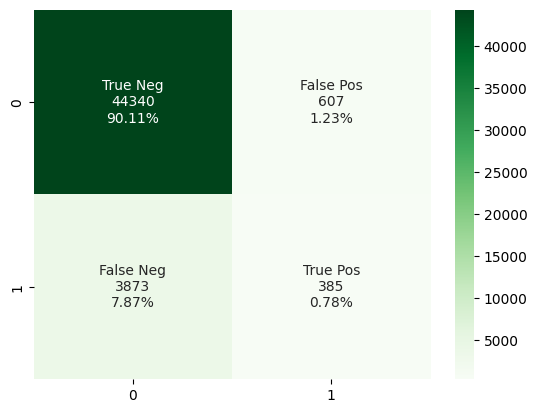

In [31]:
train(rf_classifier, X_train_resampled, y_train_resampled, X_test, y_test)
model_evaluation(rf_classifier, X_test, y_test)